In [8]:
import pandas as pd
df = pd.read_csv('hourly_data.csv', parse_dates = [['date','time']])
# df = df['available_spots']
df = df[['date_time','available_spots']]
df.date_time =df.date_time.map(lambda t: t.strftime('%Y-%m-%d %H:%M'))
df.date_time = pd.to_datetime(df.date_time,format='%Y-%m-%d %H:%M')
df = df.set_index(['date_time'])

In [19]:
print(df['2017-10-29 19:00:00'])


                     available_spots
date_time                           
2017-10-29 19:00:00              NaN


In [20]:
#preparing data
# data = df['2017-12-30 00:00:33': '2017-12-31 00:00:33']

df[df == 0] = np.nan
df.fillna(method='ffill',inplace= True)
# df = df.replace(0, np.nan)
# print(df.isnull().any())
daily_data = df.resample('D').mean().astype(int)
# daily_data

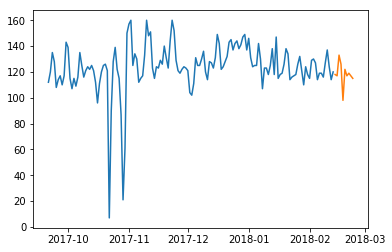

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

daily_temp = daily_data.sort_index()
daily_temp.to_csv('daily_data.csv')
# daily_temp = pd.read_csv('daily_data_Lot_2.csv',index_col=['date_time'])
# daily_temp = daily_temp.sort_index()
#divide into test and train
test_daily = daily_temp[-10:]
train_daily = daily_temp[:-10]
# p = pd.Period(df.index[0], freq='D')
#plot the data
plt.plot(train_daily)
plt.plot(test_daily)
plt.show()



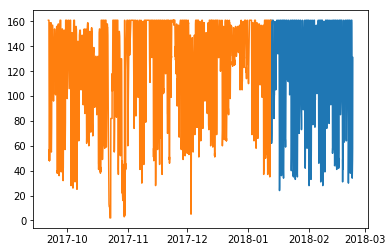

In [22]:
df_temp = df.sort_index()
df_temp.to_csv('hourly_data.csv')
# df_temp = pd.read_csv('hourly_data_lot_2.csv',index_col= ['date_time'])
train_hourly = df_temp[-1000:]
test_hourly = df_temp[:-1000]
plt.plot(train_hourly)
plt.plot(test_hourly)
plt.show()

In [ ]:
from statsmodels import ExponentialSmoothing
y_hat = test_hourly.copy()
fit1 = ExponentialSmoothing(np.asarray(train_hourly) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat['Holt_Winter'] = fit1.forecast(len(test_hourly))
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()